In [398]:
import numpy as np
import pandas as pd

In [399]:
student = pd.read_csv("student25Todo_2.csv")

In [400]:
print(student.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       1    1   18        1        2        2     4     4     4     1  ...   
1       1    1   17        1        2        1     1     1     4     5  ...   
2       1    1   15        1        1        1     1     1     4     5  ...   
3       1    1   15        1        2        1     4     2     2     3  ...   
4       1    1   16        1        2        1     3     3     5     5  ...   

   internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
0         2         2       4         3      4     1     1       3         6   
1         1         2       5         3      3     1     1       3         4   
2         1         2       4         3      2     2     3       3        10   
3         1         1       3         2      2     1     1       5         2   
4         2         2       4         3      2     1     2       5         4   

   Class  
0      1  
1      1  
2      1  


In [401]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [402]:
print('Descripción del dataset:')
print(student.describe())

Descripción del dataset:
           school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     1.116456    1.473418   16.696203    1.222785    1.711392    1.103797   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      1.000000    1.000000   15.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000   16.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000   17.000000    1.000000    2.000000    1.000000   
75%      1.000000    2.000000   18.000000    1.000000    2.000000    1.000000   
max      2.000000    2.000000   22.000000    2.000000    2.000000    2.000000   

             Medu        Fedu        Mjob        Fjob  ...    internet  \
count  395.000000  395.000000  395.000000  395.000000  ...  395.000000   
mean     2.749367    2.521519    3.483544    3.956962  ...    1.167089   
std      1.094735    1.

In [403]:
print('Distribución student-mat: Aprovechamiento escolar')
# 1 = alto desempeño, 0 = bajo desempeño
print(student.groupby('Class').size())

Distribución student-mat: Aprovechamiento escolar
Class
0    192
1    203
dtype: int64


In [404]:
print(student.drop(columns= ['Class']).head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       1    1   18        1        2        2     4     4     4     1  ...   
1       1    1   17        1        2        1     1     1     4     5  ...   
2       1    1   15        1        1        1     1     1     4     5  ...   
3       1    1   15        1        2        1     4     2     2     3  ...   
4       1    1   16        1        2        1     3     3     5     5  ...   

   higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0       1         2         2       4         3      4     1     1       3   
1       1         1         2       5         3      3     1     1       3   
2       1         1         2       4         3      2     2     3       3   
3       1         1         1       3         2      2     1     1       5   
4       1         2         2       4         3      2     1     2       5   

   absences  
0         6  
1         4  
2        10  


In [405]:
# Para graficar las matrices de confusión más adelante
import matplotlib.pyplot as plt
# Importar metrics para usar la matriz de confusión
from sklearn import metrics
# Módulo de métricas de soporte
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Para validación cruzada
from sklearn.model_selection import cross_val_score

In [406]:
# Separamos todos los datos en las características y las etiquetas o resultados
# Eje 0 = filas, eje 1 = columnas (segundo parámetro de la función drop)
X = np.array(student.drop(columns=['Class']))
y = np.array(student['Class'])

In [407]:
print(X)

[[ 1  1 18 ...  1  3  6]
 [ 1  1 17 ...  1  3  4]
 [ 1  1 15 ...  3  3 10]
 ...
 [ 2  2 21 ...  3  3  3]
 [ 2  2 18 ...  4  5  0]
 [ 2  2 19 ...  3  5  5]]


In [408]:
print(y)

[1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0
 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0
 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0
 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1]


In [409]:
# Separo los datos de "train" en entrenamiento y prueba para probar algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(f'Son {X_train.shape[0]} datos de entrenamiento y {X_test.shape[0]} datos de prueba')

Son 296 datos de entrenamiento y 99 datos de prueba


In [410]:
# Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC(C=1.2, kernel='rbf', gamma=0.0333)
algoritmo.fit(X_train, y_train)

SVC(C=1.2, gamma=0.0333)

In [411]:
Y_pred_SVM = algoritmo.predict(X_test)
# Precisión del SVM en entrenamiento
print('SVM Entrenamiento')
print(f'Precisión Máquinas de Vectores de Soporte: {algoritmo.score(X_train, y_train)}')
print(Y_pred_SVM)

SVM Entrenamiento
Precisión Máquinas de Vectores de Soporte: 0.8885135135135135
[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0
 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0]


In [412]:
# Resultado de la validación cruzada
print(cross_val_score(algoritmo, X_train, y_train, cv=5))

[0.53333333 0.59322034 0.45762712 0.6440678  0.57627119]



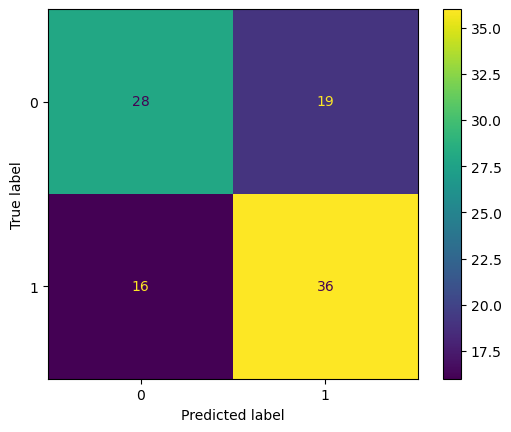

In [413]:
# Creamos la matriz de confusión
cofusion_matrix = metrics.confusion_matrix(y_test, Y_pred_SVM)

# Presentar claramente la matriz de confusión, para eso la convertimos en tabla
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cofusion_matrix, display_labels=None)

cm_display.plot()
plt.show()

In [414]:
y_true = y_test
y_pred = Y_pred_SVM

In [415]:
from sklearn.metrics import accuracy_score
print(f'Exactitud del modelo: {accuracy_score(y_true, y_pred)}')

from sklearn.metrics import f1_score 
print(f'F1: {f1_score(y_true, y_pred)}')

from sklearn.metrics import recall_score
print(f'Recall: {recall_score(y_true, y_pred)}')

from sklearn.metrics import roc_auc_score
print(f'ROC_AUC: {roc_auc_score(y_true, y_pred)}')

Exactitud del modelo: 0.6464646464646465
F1: 0.6728971962616822
Recall: 0.6923076923076923
ROC_AUC: 0.644026186579378
